In [1]:
pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
 

In [2]:
import autokeras as ak
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Automated-Machine-Learning-with-Auto-Keras/main/boston.csv")
y = df.pop("MEDV")
X = df
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2)

In [4]:
reg = ak.StructuredDataRegressor(
    max_trials=2,
    overwrite=True,
    metrics=['mae']
)

reg.fit(
    train_data.to_numpy(),
    train_targets.to_numpy(),
    epochs=50
)

Trial 2 Complete [00h 00m 10s]
val_loss: 26.196746826171875

Best val_loss So Far: 22.112211227416992
Total elapsed time: 00h 00m 35s
Epoch 1/50
13/13 [==============================] - 1s 5ms/step - loss: 583.7367 - mae: 22.2042
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 557.6664 - mae: 21.6312
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 528.6041 - mae: 20.9775
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 491.6795 - mae: 20.1307
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 442.6278 - mae: 18.9703
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 379.6268 - mae: 17.3824
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 304.5057 - mae: 15.2748
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 224.7545 - mae: 12.6450
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 155.3761 - mae: 9.9965
Epo

In [5]:
reg.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 11.3162 - mae: 2.6735


[11.316152572631836, 2.67354154586792]

In [6]:
keras_model = reg.export_model()
keras_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 multi_category_encoding (M  (None, 12)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 12)                25        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

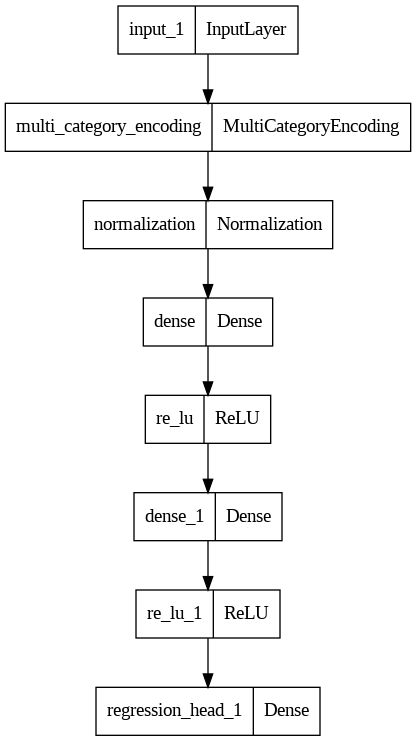

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(keras_model)

In [8]:
import tensorflow as tf

In [9]:
from sklearn.datasets import fetch_california_housing
house_dataset = fetch_california_housing()
house_dataset.keys()

import pandas as pd
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
target = pd.Series(house_dataset.target, name='MEDV')
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [11]:
import autokeras as ak
regressor= ak.StructuredDataRegressor(max_trials=10, overwrite=True)
regressor.fit(x=train_data, y=train_targets, batch_size=1024)

Trial 10 Complete [00h 00m 14s]
val_loss: 0.34341666102409363

Best val_loss So Far: 0.3068716824054718
Total elapsed time: 00h 05m 06s
Epoch 1/46
17/17 [==============================] - 1s 9ms/step - loss: 4.0707 - mean_squared_error: 4.0707
Epoch 2/46
17/17 [==============================] - 0s 10ms/step - loss: 0.8719 - mean_squared_error: 0.8719
Epoch 3/46
17/17 [==============================] - 0s 9ms/step - loss: 0.6014 - mean_squared_error: 0.6014
Epoch 4/46
17/17 [==============================] - 0s 9ms/step - loss: 0.4941 - mean_squared_error: 0.4941
Epoch 5/46
17/17 [==============================] - 0s 10ms/step - loss: 0.4395 - mean_squared_error: 0.4395
Epoch 6/46
17/17 [==============================] - 0s 9ms/step - loss: 0.4176 - mean_squared_error: 0.4176
Epoch 7/46
17/17 [==============================] - 0s 9ms/step - loss: 0.4017 - mean_squared_error: 0.4017
Epoch 8/46
17/17 [==============================] - 0s 8ms/step - loss: 0.3946 - mean_squared_error: 0.394

In [12]:
predicted_y= regressor.predict(test_data)
print(predicted_y)

129/129 [==============================] - 0s 4ms/step
[[0.83528614]
 [1.1513025 ]
 [4.25474   ]
 ...
 [4.7937922 ]
 [1.053518  ]
 [1.9827578 ]]


In [14]:
test_loss, test_mae = regressor.evaluate(test_data, test_targets, verbose=0)
print("Test MSE: ", test_mae)

Test MSE:  0.3425314128398895


# Tuning MLP with normalization and DenseBlock


In [15]:
input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(use_batchnorm=False, dropout=0.0)(output_node)
output_node = ak.RegressionHead(dropout=0.0)(output_node)
auto_model = ak.AutoModel(inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42)

In [16]:
from sklearn.datasets import fetch_california_housing
house_dataset = fetch_california_housing()
import numpy as np
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
target = pd.Series(house_dataset.target, name="MEDV")

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.2 , random_state=42)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)

Trial 10 Complete [00h 01m 13s]
val_loss: 0.5819085240364075

Best val_loss So Far: 0.28326714038848877
Total elapsed time: 00h 06m 38s
Epoch 1/150
17/17 [==============================] - 2s 19ms/step - loss: 2.4115 - mean_squared_error: 2.4115
Epoch 2/150
17/17 [==============================] - 0s 21ms/step - loss: 0.8604 - mean_squared_error: 0.8604
Epoch 3/150
17/17 [==============================] - 0s 22ms/step - loss: 0.6431 - mean_squared_error: 0.6431
Epoch 4/150
17/17 [==============================] - 1s 31ms/step - loss: 0.5244 - mean_squared_error: 0.5244
Epoch 5/150
17/17 [==============================] - 0s 25ms/step - loss: 0.4557 - mean_squared_error: 0.4557
Epoch 6/150
17/17 [==============================] - 0s 26ms/step - loss: 0.4143 - mean_squared_error: 0.4143
Epoch 7/150
17/17 [==============================] - 0s 26ms/step - loss: 0.3916 - mean_squared_error: 0.3916
Epoch 8/150
17/17 [==============================] - 1s 34ms/step - loss: 0.3783 - mean_square

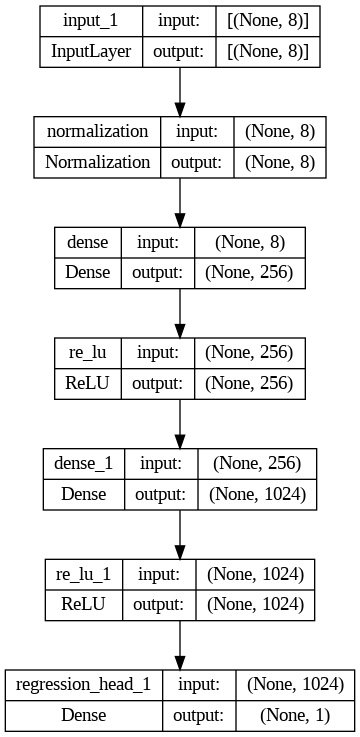

In [17]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(
    best_model, show_shapes=True, expand_nested=True
)

In [18]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print("Test accuracy: ", test_acc)

Test accuracy:  0.2767927944660187


Results summary
Results in ./auto_model
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
dense_block_2/num_layers: 2
dense_block_2/units_0: 256
dense_block_2/units_1: 1024
optimizer: adam
learning_rate: 0.001
Score: 0.28326714038848877


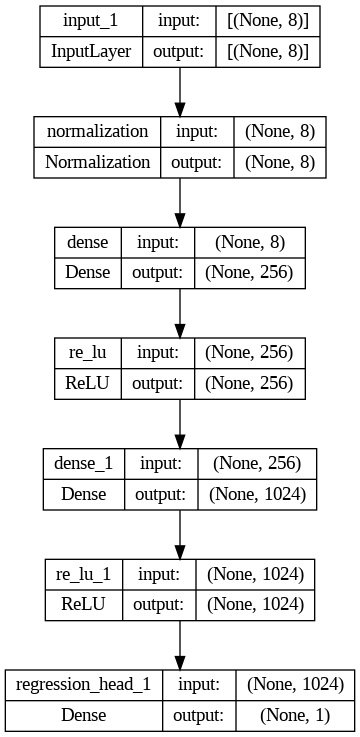

In [21]:
auto_model.tuner.results_summary(num_trials=1)
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)

In [23]:
from tensorflow import keras

best_model.save("saved_model")
best_model = keras.models.load_model("saved_model")

# Customize SearchSpace

In [24]:
from keras_tuner.engine import hyperparameters as hp

input_node = ak.StructuredDataInput()
output_node = ak.Normalization()(input_node)
output_node = ak.DenseBlock(
    num_layers=1,
    num_units = hp.Choice("num_units", [128, 256, 512, 1024]),
    use_batchnorm=False,
    dropout=0.0
)(output_node)
output_node = ak.DenseBlock(
    num_layers=1,
    num_units = hp.Choice("num_units", [16, 32, 64]),
    use_batchnorm=False,
    dropout=0.0
)(output_node)
output_node = ak.RegressionHead()(output_node)
auto_model = ak.AutoModel(inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42)

auto_model.fit(train_data, train_targets, batch_size=1024, epochs=150)

Trial 10 Complete [00h 00m 30s]
val_loss: 0.32386183738708496

Best val_loss So Far: 0.2839796543121338
Total elapsed time: 00h 07m 26s
Epoch 1/150
17/17 [==============================] - 1s 8ms/step - loss: 2.7641 - mean_squared_error: 2.7641
Epoch 2/150
17/17 [==============================] - 0s 8ms/step - loss: 0.9231 - mean_squared_error: 0.9231
Epoch 3/150
17/17 [==============================] - 0s 8ms/step - loss: 0.7378 - mean_squared_error: 0.7378
Epoch 4/150
17/17 [==============================] - 0s 8ms/step - loss: 0.6211 - mean_squared_error: 0.6211
Epoch 5/150
17/17 [==============================] - 0s 8ms/step - loss: 0.5347 - mean_squared_error: 0.5347
Epoch 6/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4755 - mean_squared_error: 0.4755
Epoch 7/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4384 - mean_squared_error: 0.4384
Epoch 8/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4155 - mean_squared_error:

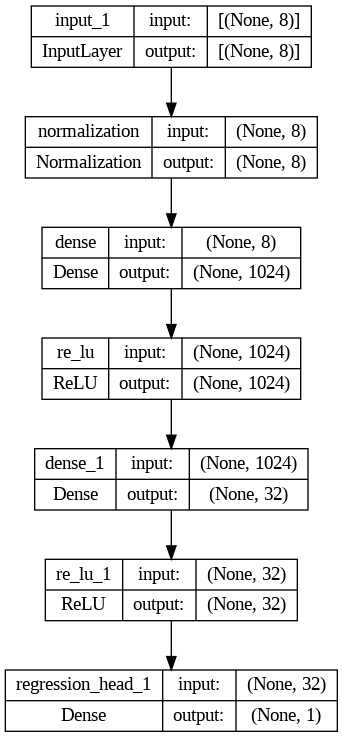

In [25]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(
    best_model, show_shapes=True, expand_nested=True
)

In [27]:
test_loss, test_acc = auto_model.evaluate(test_data, test_targets, verbose=0)
print("Test accuracy: ", test_acc)

Test accuracy:  0.2714393138885498


In [28]:
auto_model.tuner.results_summary(num_trials=1)

Results summary
Results in ./auto_model
Showing 1 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
dense_block_1/units_0: 1024
dense_block_2/units_0: 32
regression_head_1/dropout: 0.0
optimizer: adam
learning_rate: 0.001
Score: 0.2839796543121338


In [29]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1024)              9216      
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                32800     
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             